In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import math
%matplotlib inline

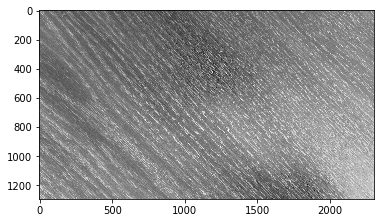

In [3]:
#./CC_TP1_photos/DSC_XXXX
img = cv2.imread("./CC_TP1_photos/DSC_0003.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="Greys")

In [4]:
#convert all images to grayscale
images = []
for i in range(1, 10):
    img = cv2.imread("./CC_TP1_photos/DSC_000{0}.png".format(i))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(gray)

img = cv2.imread("./CC_TP1_photos/DSC_0010.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
images.append(gray)

for i in range(1,6):
    img = cv2.imread("./CC_TP1_photos/DSC_001{0}.png".format(i))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(gray)
print(len(images))

15


(1296, 2304)
(1000, 1000)


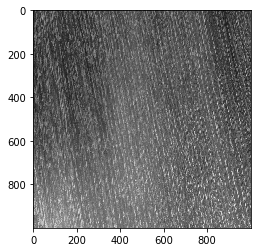

In [5]:
#we need to cut each image off
print(images[0].shape)
test = images[0][0:1000,0:1000]
print(test.shape)
plt.imshow(test, cmap="Greys")

#this crops all images
for i in range(0, len(images)):
    images[i] = images[i][0:1000,0:1000] 

uint8 (1000, 1000)


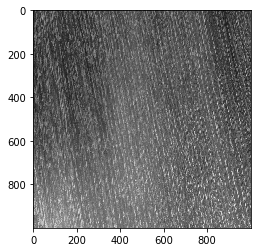

In [6]:
#convert images to double precision
#for i in range(0,len(images)):
#    images[i] = cv2.normalize(images[i].astype('int'),None,0,255,cv2.NORM_MINMAX)

#check whether or not we good...
print(images[0].dtype, images[0].shape)
plt.imshow(images[0], cmap="Greys")

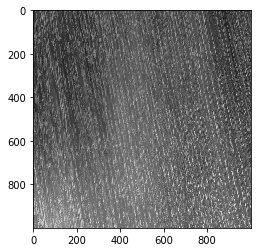

In [7]:
#denoising seems like it only works on int8 for opencv
test = cv2.fastNlMeansDenoising(images[0])
plt.imshow(test, cmap="Greys")

In [8]:
filtered = []
for i in range(0, len(images)):
    filtered.append(cv2.fastNlMeansDenoising(images[i], h=2))
print(len(filtered))

15


In [9]:
W = []
for i in range(0, len(images)):
    W.append(images[i]-filtered[i])
print(len(W))

15


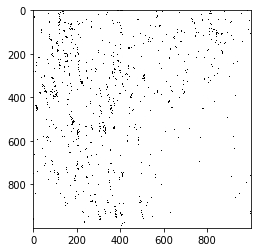

In [10]:
#show that the noise is something that we're looking at
plt.imshow(W[0], cmap="Greys")

In [11]:
def calc_contribution(W, I):
    #deal with zeros
    old_err_state = np.seterr(divide='raise')
    ignored_states = np.seterr(**old_err_state)
    return np.divide(W*I,I**2)

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


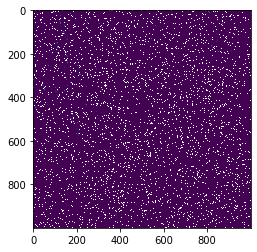

In [12]:
test_finger = calc_contribution(W[0],images[0])
plt.imshow(test_finger)

In [13]:
#store all the fingerprints
fingerprints = []
for i in range(0, len(images)):
    fingerprints.append(calc_contribution(W[i],images[i]))
print(len(fingerprints))

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


15


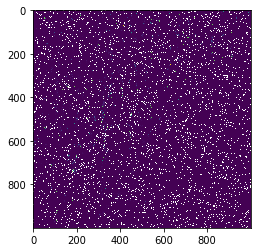

In [50]:
plt.imshow(fingerprints[3])

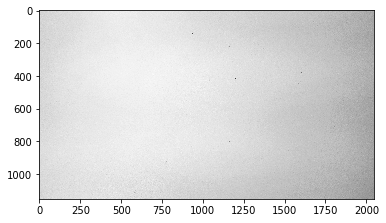

In [15]:
camera_b = []
for i in range(1,6):
    img = cv2.imread("./camera_b_photos/{0}.PNG".format(i), 0)
    camera_b.append(img)
plt.imshow(camera_b[3], cmap="Greys_r") #supposed to be mostly white

In [16]:
#calculate fingerprint B

for i in range(0, len(camera_b)):
    camera_b[i] = camera_b[i][0:1000,0:1000]

filtered_b = []
for i in range(0, len(camera_b)):
    filtered_b.append(cv2.fastNlMeansDenoising(camera_b[i], h=2))

W_b = []
for i in range(0, len(camera_b)):
    W_b.append(camera_b[i]-filtered_b[i])

fingerprints_b = []
for i in range(0, len(camera_b)):
    fingerprints_b.append(calc_contribution(W_b[i],camera_b[i]))
print(len(fingerprints_b))

5


/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


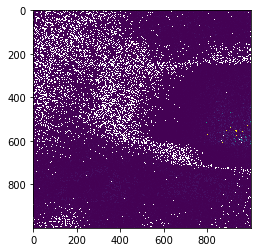

In [46]:
plt.imshow(fingerprints_b[0])

# need to do the correlations